# Data Visualisation

## 5 - Novel Variation

For individuals of recent African origin

In [1]:
# Change working directory

import os
os.chdir(r"C:\Users\User\Desktop\Megan\MSC2\Results\5._Posthoc_analysis\Pipeline_GnomAD_SAHGP_14032023\Genomic_data_analysis\Analysis\Visualisation")

In [2]:
# Import modules and packages

import os
import numpy as np
import pandas as pd
import seaborn as sns
import upsetplot
from matplotlib import pyplot as plt

import sys

sys.path.append(
    r"C:\Users\User\Desktop\Megan\MSC2\Results\5._Posthoc_analysis\Pipeline_GnomAD_SAHGP_14032023\Genomic_data_analysis"
)
import Utils.constants as constants
import Utils.functions as functions


In [3]:
# Set plot figure area and font size
sns.set(rc={"figure.figsize": (10, 8)})

plt.rc("font", size=constants.MEDIUM_FONT)  # controls default text sizes
plt.rc("axes", titlesize=constants.MEDIUM_FONT)  # fontsize of the axes title
plt.rc("axes", labelsize=constants.BIGGER_FONT)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("legend", fontsize=constants.MEDIUM_FONT)  # legend fontsize
plt.rc("figure", titlesize=constants.BIGGER_FONT)  # fontsize of the figure title

### Data imports

In [4]:
# Import gene variant counts 

recent_african_gene_count_grouped = pd.read_csv(
    os.path.join(
        constants.HOME_PATH,
        "Data",
        "Processed",
        "Gene_variant_counts.csv",
    )
).drop(columns="Unnamed: 0")

In [5]:
# Import gene novel variant counts

potential_novel_variants_grouped = pd.read_csv(
    os.path.join(
        constants.HOME_PATH,
        "Data",
        "Processed",
        "Gene_novel_variant_counts.csv",
    )
).drop(columns="Unnamed: 0")

In [6]:
# Import gene variant impact factor data

af_VEP_scored = pd.read_csv(
    os.path.join(
        constants.HOME_PATH,
        "Data",
        "Processed",
        "Variant_impact_factors.csv",
    )
).drop(columns="Unnamed: 0")

### Bar plot of novel variant counts

In [54]:
# Combine novel and variant count dataframes
total_and_novel_count = recent_african_gene_count_grouped.merge(potential_novel_variants_grouped, on=["GENE"])

# Calculate number of non-novel variants
total_and_novel_count["NON_NOVEL"] = total_and_novel_count.COUNT - total_and_novel_count.POTENTIAL_NOVEL

# Remove total count column
total_and_novel_count = total_and_novel_count.drop(columns=['COUNT']).set_index("GENE")

total_and_novel_count.head(5)

,POTENTIAL_NOVEL,NON_NOVEL
GENE,,
AGT,288,1022
AP4B1,32,127
CARD8,732,1439
CAT,178,454
COL4A1,1194,2961


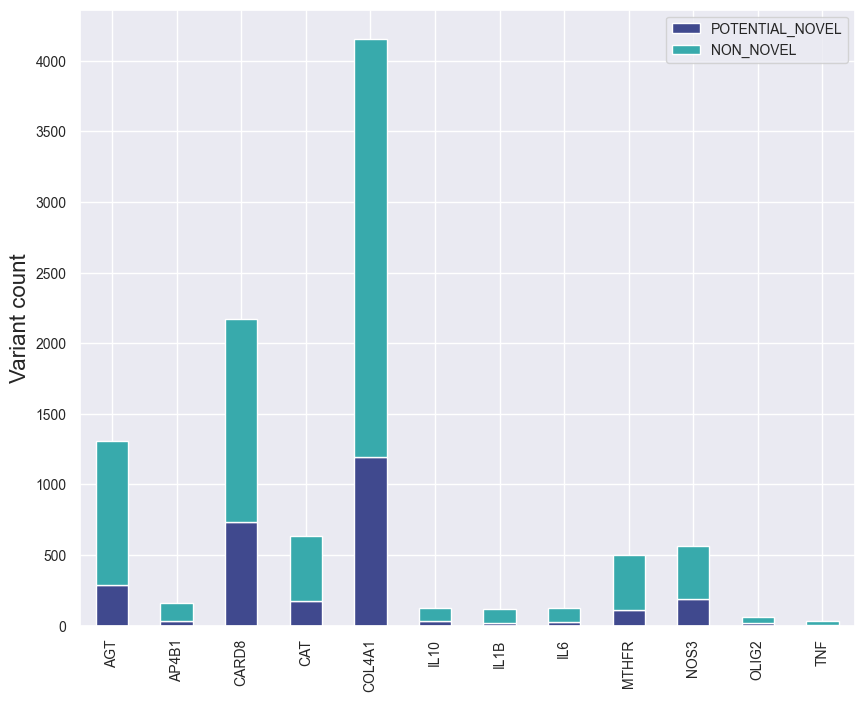

In [8]:
# Generate barplot of variant count per gene

# Construct barplot
variant_barplot = functions.create_plot(
    plot_type="stacked_barplot",
    x="GENE",
    palette=sns.color_palette("mako", 2),
    data=total_and_novel_count,
    xlabel=None,
    ylabel="Variant count",
)

plt.savefig("..\..\Results\Figures/Gene_novel_variant_count.png", dpi=1200)
plt.show()

### Bar plot of novel variant impact factor (x -axis) vs variant count (y-axis)

In [9]:
# Subset af_VEP_scored dataframe by potentially novel variants without rsID. 
af_VEP_scored_novel = af_VEP_scored[~(af_VEP_scored.ID.str.contains("rs"))]

In [52]:
af_VEP_scored_novel[af_VEP_scored_novel.VAR_IMPACT >= 1]

,ID,POS,REF,ALT,CORR_IH_AF,GENE,CADDE,FATE,DANNE,GWAVAE,FUNE,VAR_IMPACT
1,chr13:110801480C-A,110149133,C,A,0.000604,COL4A1,deleterious,deleterious,deleterious,deleterious,deleterious,5
9,chr1:114447899G-A,113905277,G,A,0.000604,AP4B1,deleterious,deleterious,deleterious,deleterious,deleterious,5
11,chr11:34449368G-A,34449368,G,A,0.000604,CAT,deleterious,deleterious,deleterious,deleterious,deleterious,5
13,chr13:110307117C-G,110307117,C,G,0.000604,COL4A1,deleterious,deleterious,deleterious,deleterious,deleterious,5
25,chr7:150993584C-T,150993584,C,T,0.000604,NOS3,deleterious,deleterious,deleterious,deleterious,deleterious,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9930,chr19:48208983CAAAAAA-C,48208983,CAAAAAA,C,0.000604,CARD8,NaN,NaN,NaN,NaN,NaN,0
9933,chr19:48208983C-CA,48208983,C,CA,0.057971,CARD8,NaN,NaN,NaN,NaN,NaN,0
9941,chr19:48207880C-T,48207880,C,T,0.000604,CARD8,neutral,neutral,neutral,neutral,?,0
9947,chr19:48208825TAAA-T,48208825,TAAA,T,0.001208,CARD8,NaN,NaN,NaN,NaN,NaN,0


In [58]:
# Group by impact factor
af_VEP_scored_novel_grouped = af_VEP_scored_novel.groupby(by=["GENE", "VAR_IMPACT"]).count().rename(columns={"ID":"COUNT"})["COUNT"].reset_index()

# Pivot data
af_VEP_scored_novel_pivot = af_VEP_scored_novel_grouped.pivot(index="GENE", columns="VAR_IMPACT", values="COUNT")

# Calculate the number of variant with an impact greater than or equal to 1
af_VEP_scored_novel_subset = af_VEP_scored_novel_pivot[[1, 2, 3, 4, 5]]
af_VEP_scored_novel_pivot["Impact >= 1"] = af_VEP_scored_novel_subset.sum(axis=1)

# Rename the column specifying that a variant has an impact factor of 0
af_VEP_scored_novel_pivot = af_VEP_scored_novel_pivot.rename(columns={0: "Impact = 0"}).drop(columns=[1, 2, 3, 4, 5]).replace(0, 0.0001)

af_VEP_scored_novel_pivot.head(5)

VAR_IMPACT,Impact = 0,Impact >= 1
GENE,,
AGT,204.0,84.0
AP4B1,17.0,15.0
CARD8,598.0,134.0
CAT,141.0,37.0
COL4A1,1060.0,134.0


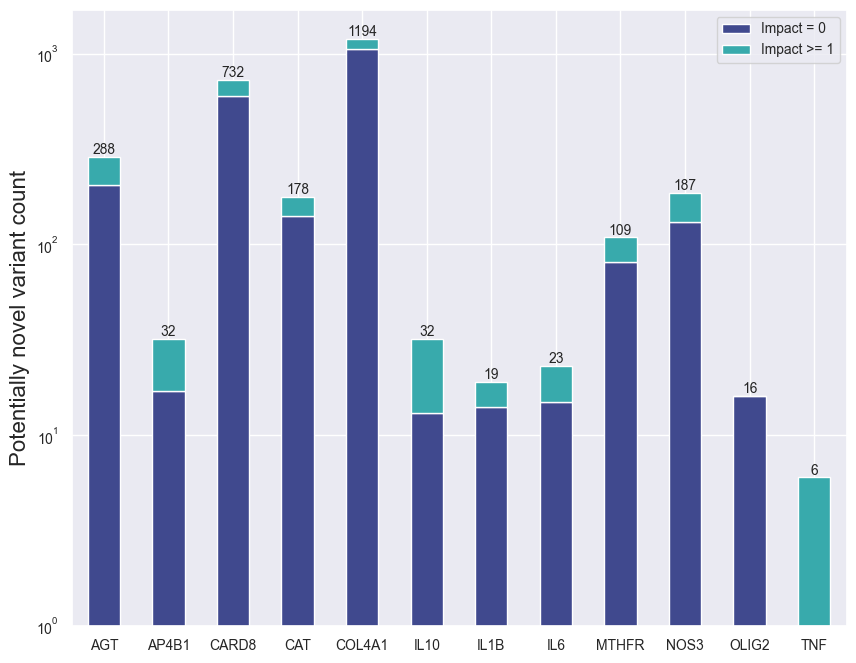

In [49]:
# Generate barplot of novel variant impact per gene

color_dict = dict({"Impact = 0":'#40498E',
                  "Impact >= 1":'#357BA3'})
novel_impact_plot = functions.create_plot(
    data=af_VEP_scored_novel_pivot,
    plot_type="stacked_barplot",
    palette=sns.set_palette("mako", 2),
    legend_title=None,
    legend_loc="upper right",
    x="VAR_IMPACT",
    xlabel=None,
    ylabel="Potentially novel variant count",
    horizontal_stack = False
)

novel_impact_plot.bar_label(novel_impact_plot.containers[1], fmt='%.0f')
plt.yscale("log")
plt.xticks(rotation=0)
plt.savefig("..\..\Results\Figures\Novel_variant_impact_factors.png", dpi=1200)
plt.show()

### Table with novel variants with a common frequency having an impact factor of 2 or more

In [12]:
# Filter af_VEP_scored_novel dataframe by variants with an impact greater than or equal to 2 and common allele frequencies.
novel_high_impact_common = af_VEP_scored_novel[(af_VEP_scored_novel.VAR_IMPACT >= 1) & (af_VEP_scored_novel.CORR_IH_AF >= 0.05)]
novel_high_impact_common.head(5)

,ID,POS,REF,ALT,CORR_IH_AF,GENE,CADDE,FATE,DANNE,GWAVAE,FUNE,VAR_IMPACT
777,chr19:48214783T-C,48214783,T,C,0.150966,CARD8,deleterious,?,deleterious,neutral,?,2
820,chr19:48214776T-C,48214776,T,C,0.063406,CARD8,deleterious,?,deleterious,neutral,?,2
822,chr19:48214775T-C,48214775,T,C,0.121981,CARD8,deleterious,?,deleterious,neutral,?,2
2909,chr1:113897142C-A,113897142,C,A,0.091787,AP4B1,neutral,?,deleterious,neutral,?,1
2962,chr13:110158027A-C,110158027,A,C,0.073068,COL4A1,neutral,?,neutral,neutral,deleterious,1
